# Проект: Исследование стартапов

Автор: Шагитова Камила

Дата: 26.02.2025

## Введение

## Цель и задачи  

**Цель:** Подготовить датасет для анализа инвестиционных решений и проверить его на полноту, согласованность и соответствие бизнес-логике. Дать ответы на ключевые вопросы заказчика, касающиеся предобработки данных, достоверности информации и значимости различных факторов для оценки перспективности стартапов.

**Задачи:**
1. Определить, по каким столбцам можно корректно объединять таблицы;
2. Проверить, можно ли доверять информации о сотрудниках стартапов и их образованиии
3. Разобраться, что означают сделки с ценой 0 или 1 доллар и насколько они репрезентативныа
4. Рассчитатькая уена в зависимости от категории стартапов и количества раундов финансирования перед его покупк
5. Рак рассчитать и отобразить численные показатели и динамику.


## Данные

Данные состоят из 7 датасетов:

- `acquisition.csv` - содержит информацию о покупках одними компаниями других компаний;
- `company_and_rounds.csv` - содержит информацию о компаниях и раундах финансирования;
- `degrees.csv` - содержит информацию об образовании сотрудника;
- `people.csv` - содержит информацию о сотрудниках;
- `degrees.csv` - содержит информацию о типе образования сотрудника;
  
  Доп. таблицы:
- `fund.csv` - содержит информацию о фондах;
- `invesment.csv` - содержит информацию о раундах инвестирования.

### Описание датасета `acquisition`
- id — идентификатор покупки;
- acquiring_company_id — идентификатор покупающей компании;
- acquired_company_id — идентификатор покупаемой компании;
- term_code — варианты расчета;
- price_amount — сумма сделки;
- acquired_at — дата сделки.

### Описание датасета `company_and_rounds`
- company ID — идентификатор компании;
- name — название компании;
- category code — категория области деятельности компании;
- status — статус компании; 
- founded at — дата инвестирования;
- closed at — дата закрытия компании;
- domain — официальный сайт компании;
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

### Описание датасета `education`
- id - идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

### Описание датасета `people`
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

### Описание датасета `degrees`
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

### Дополнительные таблицы
### Описание датасета `fund`
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

### Описание датасета `investment`
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

### 1.1. Вывод общей информации, исправление названия столбцов

In [117]:
# Импортируем библиотеки
import pandas as pd

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3

In [118]:
# Форматируем вывод чисел типа float
pd.set_option('display.float_format', '{:,.2f}'.format)

In [119]:
# Выгружаем данные
PATH = "datasets/"
acquisition = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds = pd.read_csv(PATH + 'company_and_rounds.csv')
degrees = pd.read_csv(PATH + 'degrees.csv')
education = pd.read_csv(PATH + 'education.csv')
fund = pd.read_csv(PATH + 'fund.csv')
investment = pd.read_csv(PATH + 'investment.csv')
people = pd.read_csv(PATH + 'people.csv')

In [120]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [121]:
# Выводим информацию о датафрейме
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет содержит 6 столбцов и 9407 строк, в которых содержится информация о покупках одними компаниями других компаний.

* Тип данных столбца `acquired_at` следует привести к типу данных `datetime64`, так как столбец хранит информацию о дате сделки.
* Есть пропуски в столбцах `term_code` и `acquired_at`

In [122]:
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# Выводим информацию о датафрейме
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет содержит 22 столбца и 217774 строки, в которых содержится информация о компаниях и раундах финансирования:
- Названия столбцов следует привести к стилю snake case;
- Тип данных столбцов `founded_at`, `closed_at`, `funded_at` следует привести к типу данных `datetime64`, так как столбец хранит информацию о датах.
- Также можно заметить, что во всех столбцах датасета присутствуют пропуски.
  


Можно заметить, что в датасете присутствуют два столбца с практически одинаковыми названиями `company  ID` и `company  id`. Проверим насколько они совпадают:

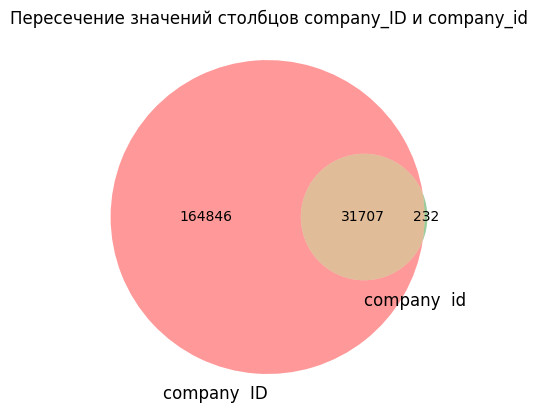

In [124]:
first_id = set(company_and_rounds['company  ID'].dropna().unique()) 
second_id = set(company_and_rounds['company  id'].dropna().unique())
#Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

#Отображаем график
plt.title("Пересечение значений столбцов company_ID и company_id")
plt.show()

Два столбца частично пересекаются, но не являются полностью идентичными.

* В столбце company ID (большой круг) содержится 164 846 уникальных значений, которые отсутствуют в company id.
* В company id (маленький круг) есть 232 уникальных значения, которых нет в company ID.
* Совпадают 31 707 значений, что указывает на частичное пересечение.

Скорее всего столбец company id относится к раундам финансирования, проверим это при дальнейшем анализе.

In [125]:
# Приводим названия столбцов к стилю snake case
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ', '_')
company_and_rounds.columns

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

In [126]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [127]:
# Выводим информацию о датафрейме
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109610 строк, в которых содержится информация об образовании сотрудника.
- Тип данных столбца `graduated_at` следует привести к типу данных `datetime64`, так как столбец хранит информацию о датах;
- Также в этом столбце довольно большое кол-во пропусков.

In [128]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


In [129]:
# Выводим информацию о датафрейме
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет содержит 5 столбцов и 226709 строк, в которых содержится информация о сотрудниках.

- Тип данных датафрейма представлены корректно.
- Есть довольно большое кол-во пропусков в столбцах `company_id` и `network_username`

In [130]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [131]:
# Выводим информацию о датафрейме
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет содержит 4 столбца и 109609 строк, в которых содержится информация о типе образования сотрудника.

- Типы данных датафрейма представлены корректно.
- Есть пропуски в столбцах `degree_type` и `subject`

In [132]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [133]:
# Выводим информацию о датафрейме
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет содержит 9 столбцов и 11652 строки, в которых содержится информация о фондах.

- Тип данных столбца `founded_at` следует привести к типу данных `datetime64`, так как столбец хранит информацию о датах.
- Также большую часть пропусков содержат столбцы `domain`, `network_username`, `country_code`

In [134]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [135]:
# Выводим информацию о датафрейме
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет содержит 4 столбца и 61402 строки, в которых содержится информация о раундах инвестирования.

- Тип данных датафрейма представлены корректно.
- Пропусков нет

### 1.2. Смена типов и анализ пропусков


In [136]:
# Приведем столбцы с датами к типу данных datetime64
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'], errors = 'coerce')
education['graduated_at'] = pd.to_datetime(education['graduated_at'], errors = 'coerce')
fund['founded_at'] = pd.to_datetime(fund['founded_at'], errors = 'coerce')

for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds[column] = pd.to_datetime(company_and_rounds[column], errors = 'coerce')

Исходя из полученных результатов в шаге 1.1, можно сделать вывод, что в датасетах количество пропусков достаточно большое, чтобы их просто удалить. 
Так как замена пропусков может повлиять на дальнейший анализ, то пока оставим их как есть.


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


1. Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

2. Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

3. На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

In [137]:
# Извлекаем год финансирования из столбца funded_at
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

In [138]:
#Строим сводную таблицу
pivot_table = pd.pivot_table(
    company_and_rounds,
    index = 'year',
    values = 'raised_amount',
    aggfunc = {'raised_amount': ['median', 'count']})
#Фильтруем по кол-ву раундов финансирования
pivot_table = pivot_table[pivot_table['count']>50].reset_index()
pivot_table

,year,count,median
0,"1,999.00",76,"2,000,000.00"
1,"2,000.00",125,"4,200,000.00"
2,"2,001.00",96,"3,000,000.00"
3,"2,002.00",116,"4,200,000.00"
4,"2,003.00",159,"3,000,000.00"
5,"2,004.00",291,"5,000,000.00"
6,"2,005.00",1633,"5,500,000.00"
7,"2,006.00",2436,"5,000,000.00"
8,"2,007.00",3279,"3,973,320.00"
9,"2,008.00",3774,"3,110,000.00"


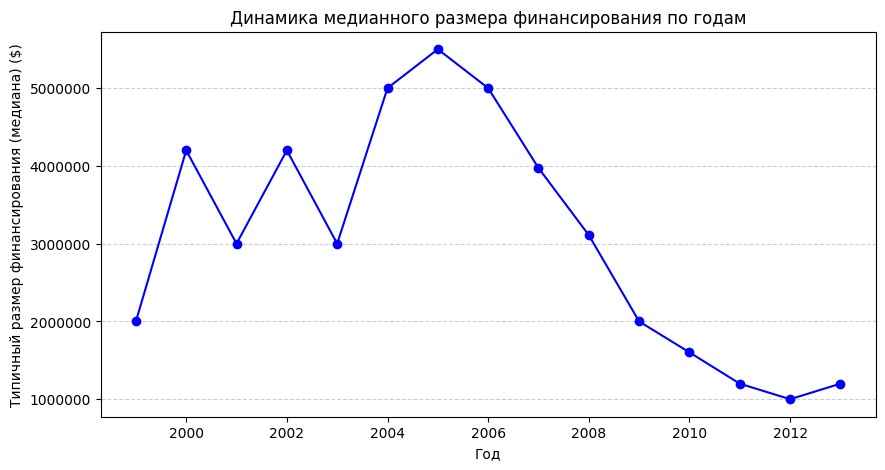

In [270]:
# Задаем размеры графика
plt.figure(figsize = (10, 5))
# Изменяем отображение оси Y
plt.ticklabel_format(style='plain')
# Строим линейный график
plt.plot(pivot_table['year'],
         pivot_table['median'],
         marker = 'o', 
         color = 'b'
)

#Название и подписи осей 
plt.title('Динамика медианного размера финансирования по годам')
plt.ylabel('Типичный размер финансирования (медиана) ($)')
plt.xlabel('Год')

# Сетка
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()

В каком году типичный размер собранных в рамках одного раунда средств был максимален?

- Типичный размер собранных в рамках одного раунда средств был максимален в 2005 году.

Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

- В 2013 году было 11 072 раунда, что больше, чем в 2012 году (9 970) и 2011 году (9 204).
Это указывает на увеличение количества стартапов или инвестиций в проекты.
- Медианный размер финансирования немного вырос по сравнению с предыдущим:
    * В 2012 году медианная сумма финансирования в раунде была 1 000 000 долларов.
    * В 2013 году она увеличилась до 1 200 000 долларов.


### 2.2. Люди и их образование

* Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.


In [140]:
# Считаем колво сотрудников в каждой компании
company_sizes = people.groupby('company_id')['id'].count().reset_index()
company_sizes.columns = ['company_id', 'cnt_people']
company_sizes.head()

,company_id,cnt_people
0,1.00,2
1,2.00,1
2,3.00,3
3,4.00,13
4,5.00,61


In [141]:
# Присоединяем people к education, чтобы определить, у кого есть образование
df = people.merge(education, how = 'left', left_on = 'id', right_on = 'person_id', suffixes = ('_people','_education'))
df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [142]:
# Присоединяем к датафрейму таблицу с расчетом кол-ва сотрудников
df = df.merge(company_sizes, on = 'company_id', how = 'left')
df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,cnt_people
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,61.00
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,10.00
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [143]:
# Ищем неявные дубликаты по столбцам содержащим инф-ю о сотрудниках
df.duplicated(subset = ['id_people', 'first_name', 'last_name', 'company_id']).sum()

40985

In [144]:
# Удаляем дубликаты
df = df.drop_duplicates(subset = ['id_people', 'first_name', 'last_name'])

In [145]:
# Для разбиения компании на группы, посчитаем кол-во компаний с разными кол-вами сотрудников
company_sizes['cnt_people'].value_counts()

cnt_people
1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
19         3
20         3
18         3
15         3
29         2
25         2
56         2
22         2
21         2
31         1
138        1
35         1
47         1
32         1
39         1
63         1
36         1
51         1
48         1
244        1
61         1
150        1
26         1
72         1
Name: count, dtype: int64

- Видно, что подавляющее большинство компаний (18117) имеют 1 сотрудника, а затем резкое снижение количества для 2 (2709) и 3 (921).
Это говорит о том, что многие компании, вероятно, представляют собой стартапы с одним основателем или небольшие команды на ранней стадии развития.
Эти компании следует поместить в отдельные категории.
- Чуть меньше компаний имеют 4-7 сотрудников. Объединим их в одну группу.
- Компаний, имеющих 8-13 сотрудников - меньше ста в каждой. Поместим их в отдельную категорию.
- Кол-во компаний с 14-25 сотрудниками достаточно близки (меньше 10 компаний в каждой). Выделим отдельную группу.
- После 25 сотрудников компании становятся единичными случаями, и их проще объединить в одну группу.

In [146]:
# Разделяем компании на группы по размеру:
df['company_size_group'] = pd.cut(df['cnt_people'], bins = [0, 1, 2, 3, 7, 13, 25, float('inf')], 
                                  labels = ['1', '2', '3', '4-7', '8-13', '14-25', '26+']) # Категории
df.head()

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,cnt_people,company_size_group
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT,61.00,26+
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT,10.00,8-13
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT,3.00,3
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT,2.00,2
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [147]:
# Добавляем столбец, который содержит данные, у кого есть данные об образовании
df['has_educ'] = df['instituition'].notna()
# Добавляем столбец, который содержит данные, у кого отсутствуют данные об образовании
df['no_educ'] = 1 - df['has_educ']
# Считаем долю сотрудников без данных об образовании в каждой группе
df.groupby('company_size_group', observed=False)['no_educ'].mean().reset_index()

,company_size_group,no_educ
0,1,0.46
1,2,0.47
2,3,0.49
3,4-7,0.51
4,8-13,0.51
5,14-25,0.46
6,26+,0.27


- По получившимся данным, можно сделать вывод, что чем больше сотрудников в компании, тем меньше средняя доля сотрудников без информации об образовании. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [151]:
# Считаем пропуски в company_and_rounds
print('Датасет company_and_rounds:')
c_r_cnt_null = company_and_rounds['network_username'].isna().sum()
print(f' Кол-во пропусков в столбце network_username: {c_r_cnt_null}')
share_c_r_null = c_r_cnt_null / len(company_and_rounds)
print(f' Доля строк с пропусками в столбце network_username: {share_c_r_null}')

Датасет company_and_rounds:
 Кол-во пропусков в столбце network_username: 122240
 Доля строк с пропусками в столбце network_username: 0.5613158595608291


In [152]:
# Считаем пропуски в столбце people
print('Датасет people:')
people_cnt_null = people['network_username'].isna().sum()
print(f' Кол-во пропусков в столбце network_username: {people_cnt_null}')
share_people_null = people_cnt_null / len(people)
print(f' Доля строк с пропусками в столбце network_username: {share_people_null}')

Датасет people:
 Кол-во пропусков в столбце network_username: 187842
 Доля строк с пропусками в столбце network_username: 0.8285599601250943


In [153]:
# Проверим дублирование
duplicates_comp = company_and_rounds["network_username"].value_counts()
duplicates_people = people["network_username"].value_counts()

# Посчитаем сколько значений встречаются несколько раз
multi_comp = (duplicates_comp > 1).sum()
multi_people = (duplicates_people > 1).sum()

print(f"Количество повторов в company_and_rounds: {multi_comp}")
print(f"Количество повторов в people: {multi_people}")

Количество повторов в company_and_rounds: 8409
Количество повторов в people: 425


In [154]:
# Находим уникальные значения в каждом датасете
unique_people = set(people["network_username"].dropna().unique())
unique_comp = set(company_and_rounds["network_username"].dropna().unique())

# Найдем пересечение
common_usernames = unique_people.intersection(unique_comp)
common_usernames_share = len(common_usernames) / len(unique_comp)

# Вывод результатов
print(f'Уникальных network_username в people: {len(unique_people)}')
print(f'Уникальных network_username в company_and_rounds: {len(unique_comp)}')
print(f'Общее количество пересечений: {len(common_usernames)}')
print(f'Доля пересечений от общего кол-ва уникальных network_username в company_and_rounds: {common_usernames_share}')

Уникальных network_username в people: 38421
Уникальных network_username в company_and_rounds: 79571
Общее количество пересечений: 2199
Доля пересечений от общего кол-ва уникальных network_username в company_and_rounds: 0.027635696422063316


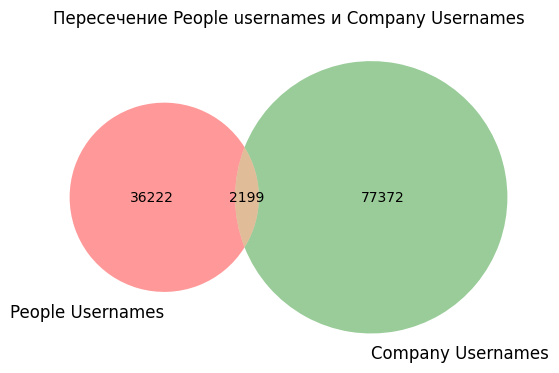

In [155]:
# Строим диаграмму Венна
venn2([unique_people, unique_comp], set_labels=('People Usernames', 'Company Usernames'))

#Отображаем график
plt.title("Пересечение People usernames и Company Usernames")
plt.show()

Столбец `network_username` нельзя использовать для объединения, так как общее количество пересечений между столбцами довольно маленькое, что делает ключ бесполезным для объединения.

Объединение таблиц по данному столбцу приведет к потере данных и возможным ошибкам.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Приведем данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. 

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [156]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [157]:
#Считаем кол-во пропусков в датасете
company_and_rounds.isna().sum()

company_ID                302
name                      303
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
year                   165094
dtype: int64

In [158]:
# Считаем долю строк с пропусками
company_and_rounds.isna().sum() / len(company_and_rounds)

company_ID            0.00
name                  0.00
category_code         0.34
status                0.00
founded_at            0.50
closed_at             0.98
domain                0.32
network_username      0.56
country_code          0.50
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
funding_round_id      0.76
company_id            0.76
funded_at             0.76
funding_round_type    0.76
raised_amount         0.76
pre_money_valuation   0.76
participants          0.76
is_first_round        0.76
is_last_round         0.76
year                  0.76
dtype: float64

Начиная со столбца `funding_round_id`, можно заметить, что доля пропусков массивна и практически идентична  — это намекает на то, что данные изначально логически делились на две части:
- информация о компаниях
- информация о раундах финансирования


In [159]:
# Создаем списки столбцов для двух датасетов
company_columns = ['company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 
                   'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']
rounds_columns = ['funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 
                  'participants', 'is_first_round', 'is_last_round']

Начнем работу с датасета `company`:

In [160]:
#Создаем новый датасет с компаниями
company = company_and_rounds[company_columns]
company.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00


In [161]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float64       
 1   name               217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [162]:
# Удаляем строки в которых все значения пропущены
company = company.dropna(how = 'all')
company.shape[0]

217472

In [163]:
# Проверяем наличие явных дубликатов
company.duplicated().sum()

20919

In [164]:
# Удаляем дубликаты
company = company.drop_duplicates()
company.shape[0]

196553

Теперь датасет `rounds`:

In [165]:
# Создаем новый датасет с раундами финансирования
rounds = company_and_rounds[rounds_columns]
rounds.head()

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 15.0+ MB


In [167]:
#Удалим строки в которых все значения пропущены
rounds = rounds.dropna(how = 'all')
rounds.shape[0]

52928

In [168]:
# Проверяем наличие явных дубликатов
rounds.duplicated().sum()

0

Явных дубликатов не обнаружено. Проверим неявные дубликаты

In [169]:
rounds.duplicated(subset = ['funding_round_id', 'company_id']).sum()

0

### Промежуточный вывод
**В ходе предварительного исследования:** 

1. Была создана сводная таблица и построен график, на основании которых была изучена динамика медианного размера финансирования по годам.
2. Было выяснено, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.
3. Установлено, что использовать столбцы с именем network_username для объединения данных не стоит.
4. Датасет company_and_rounds был разделен на 2 части: в одном содержится информация о компаниях, в другом - о раундах финансирования. Также в каждом новом датасете были удалены строки с пропущенными значениями и дубликаты


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных


In [170]:
# Фильтруем датасет по условиям
company_filtered = company[(company['funding_rounds']>0) | (company['investment_rounds']>0) | (company['status'] == 'acquired')]
company_filtered.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
3,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
4,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
15,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00
20,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.


In [171]:
# Изучаем статистические показатели столбца funding_total
company_filtered['funding_total'].describe()

count          40,747.00
mean       10,135,609.64
std        56,464,359.98
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,650,650.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

- средняя сумма финансирования составляет около 10.1 млн долларов и не отражает типичное финансирование из-за влияния крупных выбросов.
- медианная сумма финансирования (600 тыс. долларов) намного меньше среднего значения. Это говорит о том, что распределение размера общего финансирования асимметрично, сильно скошенно вправо. 
- стандартное отклонение 56.4 млн, что говорит о высоком разбросе данных.
- четверть компаний не получила никакого финансирования (0 долларов).
- три четверти компаний получили финансирование менее 5.65 млн долларов.
- максимальное финансирование 5.7 млрд долларов, что говорит о наличии сильных выбросов.

Обычные способы  неприменимы к этим данным, потому что распределение суммы финансирования сильно асимметрично. 

Для визуализации распределения суммы финансирования построим диаграмму размаха.

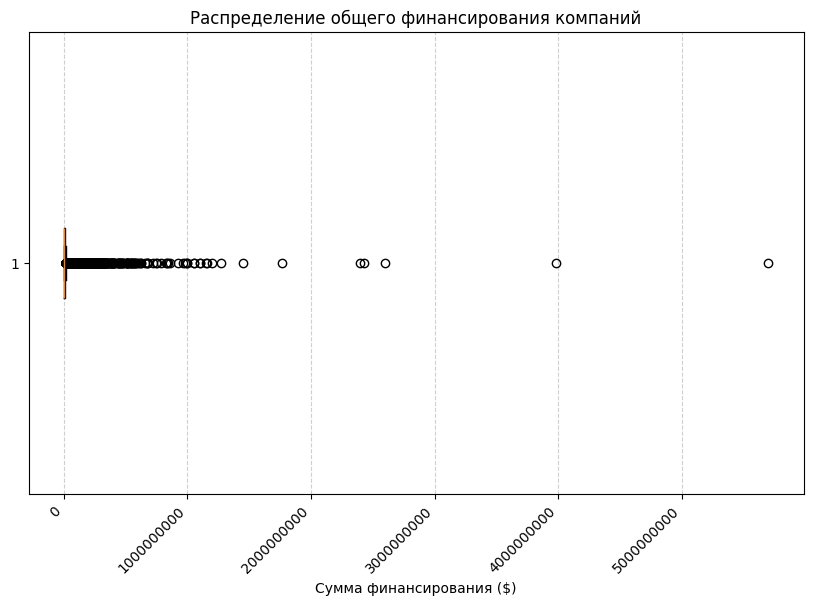

In [172]:
plt.figure(figsize = (10,6))
# Изменяем формат отображения меток осей
plt.ticklabel_format(style='plain')
# Строим боксплот
plt.boxplot(company_filtered['funding_total'].dropna(),
            vert = False)
# Изменяем разворот меток на оси Х
plt.xticks(rotation = 45, ha='right')
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
# Название осей и заголовок
plt.xlabel('Сумма финансирования ($)')
plt.title('Распределение общего финансирования компаний')
plt.show()

Ввиду огромного кол-ва выбросов визуализация получилась ненаглядной, построим диаграмму размаха без их учета.

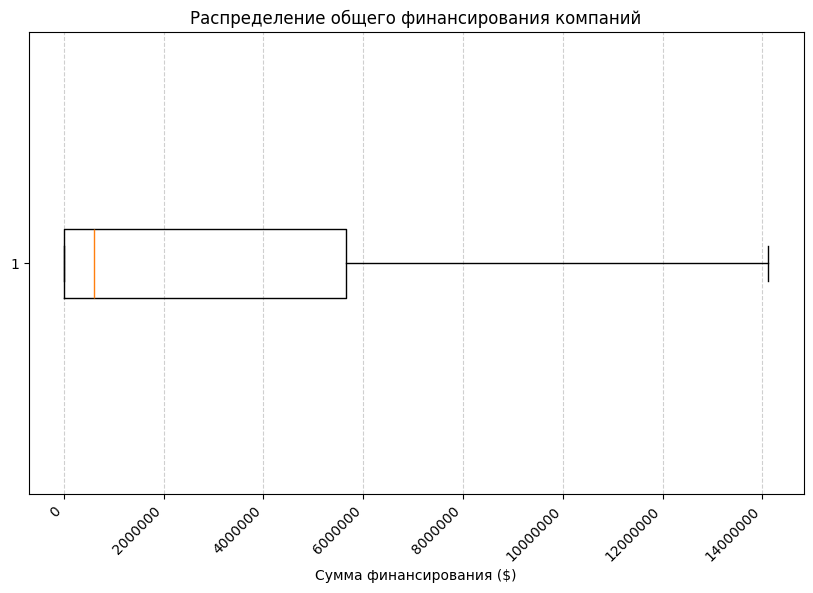

In [173]:
plt.figure(figsize = (10,6))
# Изменяем формат отображения осей
plt.ticklabel_format(style='plain')
# Строим боксплот
plt.boxplot(company_filtered['funding_total'].dropna(),
            vert = False,
            showfliers=False)
# Изменяем разворот меток на оси Х
plt.xticks(rotation = 45, ha='right')
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
# Название осей и заголовок
plt.xlabel('Сумма финансирования ($)')
plt.title('Распределение общего финансирования компаний')
plt.show()

По получившимся графикам можно сделать следующие выводы:
- Межквартильный размах составляет от 0 до 5.65 млн. долларов - эти значения можно считать типичными размерами финансирования. Распределение, как уже было подмечено, асимметрично скошенно вправо.
- Медианное значение = 600 000 долларов - наиболее типичное финансирование для одной компании.
- Максимальный размер финансирования составляет ~14 млн. долларов.
- Экстремальные выбросы — финансирование выше 14 млн долларов и особенно до 5.7 млрд долларов — такое финансирование компаний явно нетипично.


### 3.3. Куплены забесплатно?

* Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total`.

In [174]:
# Присоединяем к таблице компаний таблицу с покупками 
sell_company = company_filtered.merge(acquisition, left_on = 'company_ID', right_on = 'acquired_company_id')
# Фильтруем компании по условию
sell_company = sell_company[((sell_company['price_amount'] == 0) | (sell_company['price_amount'] == 1)) & (sell_company['funding_total'] > 0)]
sell_company.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,"10,054.00",Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,"121,500,000.00",3.00,9288,23283,10054,cash_and_stock,0,2013-08-13
17,"101,312.00",SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,"4,000,000.00",2.00,9653,11391,101312,NaN,0,2013-09-18
18,"101,340.00",ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,"250,000.00",1.00,7272,1972,101340,NaN,0,2012-06-18
19,"10,137.00",Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,"1,310,000.00",2.00,8254,757,10137,cash_and_stock,0,2012-11-05
20,"10,139.00",TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,"44,925,000.00",1.00,9326,44008,10139,NaN,0,2013-04-01


In [175]:
# Изучаем статистические показатели столбца funding_total
sell_company['funding_total'].describe()

count           1,618.00
mean       18,152,961.94
std       144,503,027.47
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,500,000.00
max     5,700,000,000.00
Name: funding_total, dtype: float64

Для расчёта границ выбросов для `funding_total` используем метод межквартильного размаха.
Формула:
* IQR=Q3−Q1
* Нижняя граница=Q1−1.5×IQR
* Верхняя граница=Q3+1.5×IQR

In [176]:
# расчет квартилей
Q1 = sell_company['funding_total'].quantile(0.25)  # 25-й процентиль
Q3 = sell_company['funding_total'].quantile(0.75)  # 75-й процентиль
# Межквартильный размах
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR  # Нижняя граница
upper_bound = Q3 + 1.5 * IQR  # Верхняя граница

print(f"Нижняя граница выбросов: {lower_bound:,.2f}")
print(f"Верхняя граница выбросов: {upper_bound:,.2f}")

Нижняя граница выбросов: -18,250,000.00
Верхняя граница выбросов: 35,750,000.00


Выводы:
- Отрицательное значение финансирования не имеет смысла, так как сумма финансирования не может быть меньше нуля, поэтому стоит заменить нижнюю границу на 0.
- Установление верхней границы на уровне 35.75 млн. долларов означает, что все компании с финансированием выше этой суммы будут считаться выбросами. Так у нас довольно скошенное распределение вправо (а IQR отсекает слишком много, не учитывая ее), то логичнее поставить порог выше, чтобы не удалять крупные, но все еще реалистичные финансирования компаний.
- Более корректным будет расчитать верхнюю границу выбросов с 99-й процентилем, т.к. 99-й процентиль естественно отражает верхнюю границу типичных значений.

In [177]:
# 99-й процентиль
Q3 = sell_company['funding_total'].quantile(0.99)  
# Межквартильный размах
IQR = Q3 - Q1

lower_bound = 0
upper_bound = Q3 + 1.5 * IQR  

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound:,.2f}")

Нижняя граница выбросов: 0
Верхняя граница выбросов: 375,882,325.00



### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

In [288]:
# Присоединяем к таблице компаний таблицу с покупками 
df_startups = company_filtered.merge(acquisition, left_on = 'company_ID', right_on = 'acquired_company_id')
# Оставляем компании которые продали за ненулевую стоимость 
df_startups = df_startups[(df_startups['price_amount']>0)]
df_startups.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00,1,11,10,NaN,20000000,2007-05-30
2,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00,1901,5,1001,cash_and_stock,47500000,2009-08-10
9,"1,007.00",Rupture,games_video,acquired,NaT,NaT,rupture.com,rupture,USA,0.00,1.00,"3,000,000.00",2.00,2186,851,1007,cash,15000000,2008-05-08
23,"101,519.00",Vidacare,hardware,acquired,NaT,NaT,vidacare.com,NaN,USA,0.00,1.00,"274,999.00",0.00,10214,65984,101519,NaN,262500000,2013-10-29
24,"10,158.00",StudioNow,photo_video,acquired,2007-01-01,NaT,studionow.com,NaN,USA,0.00,3.00,"15,286,400.00",1.00,2923,351,10158,cash_and_stock,36500000,2010-01-25


Для группировки используем медиану, так как она более устойчива к выбросам, чем среднее. Для выявления категорий с наибольшим разбросом цен рассчитаем стандартное отклонение, так как оно помогает выявить категории с большим разбросом цен.

In [289]:
# Группируем по категориям стартапов и вычисляем медиану, стандартное отклонение цены сделки, и кол-во стартапов
category_stats = df_startups.groupby('category_code')['price_amount'].agg(['median', 'std', 'count']).reset_index()
category_stats.columns = ['category_code', 'median_price', 'std_price', 'count']
category_stats.head()

,category_code,median_price,std_price,count
0,advertising,"60,000,000.00","495,483,858.21",84
1,analytics,"200,000,000.00","92,967,736.34",3
2,automotive,"2,400,000,000.00","2,581,669,292.02",3
3,biotech,"200,000,000.00","1,968,195,263.66",263
4,cleantech,"185,000,000.00","874,419,628.26",39


In [290]:
# Фильтруем категории, оставляя только те, в которых больше 5 стартапов 
category_stats = category_stats[category_stats['count'] > 5]

В топе оставляем 5 категорий. Это оптимальное количество, чтобы:
- Отразить основные тренды без перегрузки информацией.
- Избежать включения малопредставленных категорий с недостаточными данными.

In [291]:
# Считаем топ5 категорий по наибольшей цене
top5_median_price = category_stats.sort_values(by = 'median_price', ascending = False).head()
top5_median_price

,category_code,median_price,std_price,count
27,real_estate,"400,000,000.00","2,676,302,206.40",6
16,manufacturing,"351,000,000.00","1,060,434,506.33",21
3,biotech,"200,000,000.00","1,968,195,263.66",263
4,cleantech,"185,000,000.00","874,419,628.26",39
10,finance,"171,500,000.00","1,052,920,128.98",20


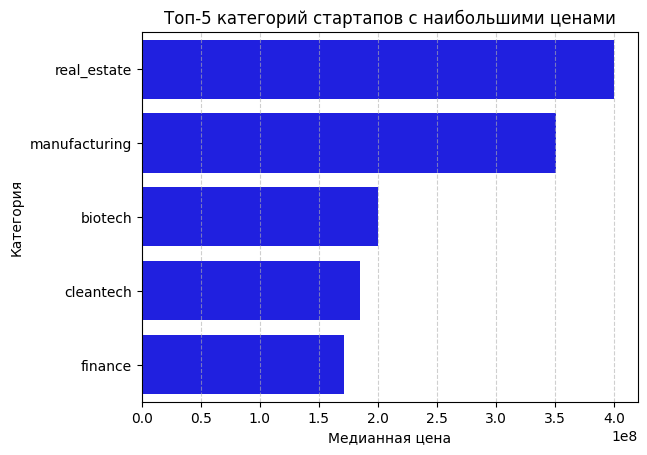

In [284]:
# Строим линейчатый график
sns.barplot(top5_median_price,
            y = 'category_code',
            x = 'median_price',
            color = 'b')
# Название осей и заголовок
plt.title('Топ-5 категорий стартапов с наибольшими ценами')
plt.ylabel('Категория')
plt.xlabel('Медианная цена')
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.show()

- Лидером по медианной цене сделок является категория real_estate, за ней следуют manufacturing, biotech, cleantech и finance.

In [292]:
# Отбрасываем значения больше 90-го квартиля
top5_std_price = category_stats[category_stats['std_price'] <= category_stats['std_price'].quantile(0.90)]
# Считаем топ5 категорий по наибольшему разбросу
top5_std_price = top5_std_price.sort_values(by = 'std_price', ascending = False).head()
top5_std_price

,category_code,median_price,std_price,count
24,other,"71,550,000.00","2,060,860,617.08",84
3,biotech,"200,000,000.00","1,968,195,263.66",263
13,health,"140,000,000.00","1,927,099,525.34",10
11,games_video,"58,250,000.00","1,463,477,654.30",88
29,security,"164,500,000.00","1,378,442,023.15",36


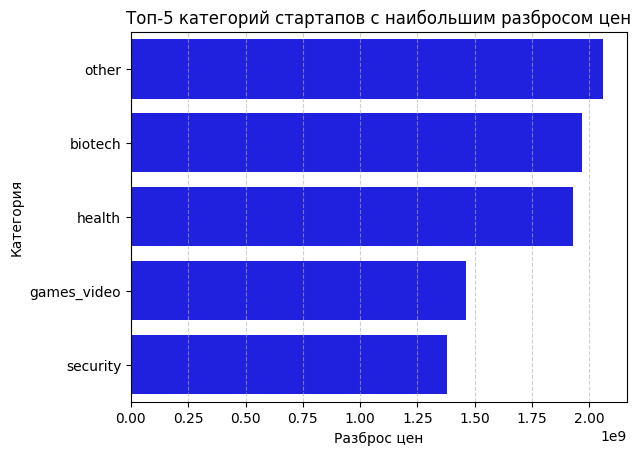

In [293]:
# Строим линейчатый график
sns.barplot(top5_std_price,
            y = 'category_code',
            x = 'std_price',
            color = 'b')
# Название осей и заголовок
plt.title('Топ-5 категорий стартапов с наибольшим разбросом цен')
plt.ylabel('Категория')
plt.xlabel('Разброс цен')
# Сетка
plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
plt.show()

- Категория other показывает самый значительный разброс цен, что может быть связано с включением разнообразных стартапов без четкой классификации.
- Высокий разброс цен также наблюдается в категориях biotech, health, games_video и security.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [188]:
# Группируем данные по статусу стартапа и вычисляем среднее кол-во раундов
mean_rounds = company_filtered.groupby('status')['funding_rounds'].mean()
mean_rounds.sort_values(ascending = False)

status
ipo         1.93
operating   1.52
closed      1.38
acquired    0.52
Name: funding_rounds, dtype: float64

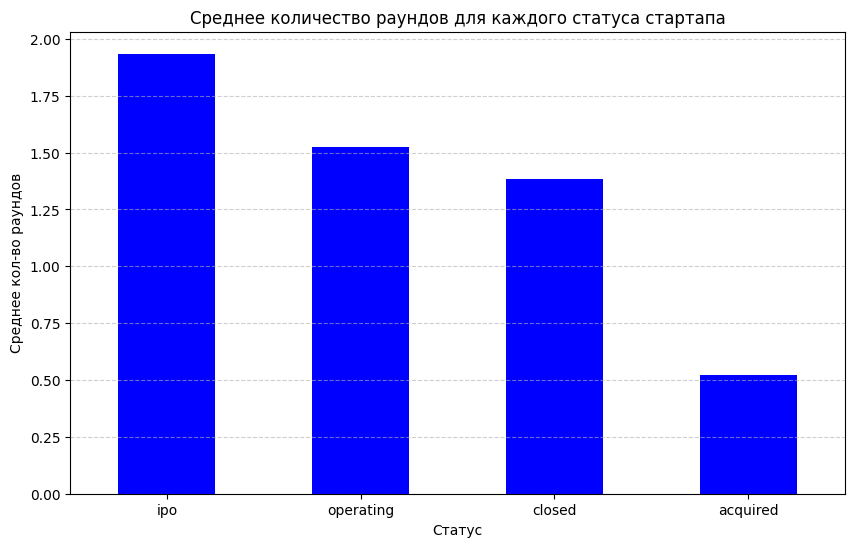

In [189]:
# Задаем размер графика
plt.figure(figsize = (10,6))
# Строим график
mean_rounds.sort_values(ascending = False).plot(kind = 'bar',
                                               color = 'b')
# Название осей и заголовок
plt.title('Среднее количество раундов для каждого статуса стартапа')
plt.xlabel('Статус')
plt.ylabel('Среднее кол-во раундов')
plt.xticks(rotation = 0)
# Сетка
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.show()


- Наибольшее количество раундов проходили компании, вышедшие на IPO (1.93 раунда).
Это логично, так как успешные стартапы чаще проходят через несколько этапов привлечения средств перед публичным размещением.
- Операционные компании (operating) имеют 1.52 раунда в среднем. Это подтверждает, что действующие стартапы продолжают привлекать инвестиции, но не все доходят до IPO.
- Закрывшиеся стартапы (closed) в среднем имели 1.38 раунда финансирования. Это может свидетельствовать о том, что они успели привлечь финансирование, но затем не смогли развиться или окупить вложенные средства.
- Наименьшее среднее число раундов (0.52) у стартапов со статусом acquired (приобретенные). Это может означать, что такие компании продаются на ранних стадиях, часто без необходимости многократного привлечения инвестиций.

Можно сделать вывод, что чем дольше стартап живет и развивается, тем больше раундов финансирования он проходит. IPO-компании чаще всего получают больше инвестиций, а стартапы, быстро поглощенные (acquired), наоборот, требуют меньше внешнего финансирования.


## Шаг 4. Итоговый вывод и рекомендации

В рамках анализа были исследованы ключевые аспекты финансирования и жизненного цикла стартапов, а именно:

1. Был проведен анализ распределения компаний по числу сотрудников, что позволило выделить логичные категории.
Большая часть компаний представлена малыми командами (1-3 человека), после чего наблюдается постепенное снижение числа компаний с увеличением штата.
2. Была проведена оценка типичного размера финансирования и выбросов. Анализ столбца funding_total показал значительное расхождение между медианным (600 тыс. долларов) и средним значением (10 млн долларов), что указывает на наличие выбросов.
Графическое исследование подтвердило, что данные имеют длинный правый хвост — небольшая часть компаний привлекла очень крупные суммы финансирования.
3. Определены верхняя и нижняя граница выбросов по финансированию и оценка корректности их замены.
Верхняя граница выбросов составила 375 882 325 долларов, нижняя – 0.
4. Определены категории стартапов с наибольшими и наиболее разбросанными ценами.
Определены отрасли, где стартапы привлекают крупнейшие инвестиции и имеют значительные отклонения по стоимости.
5. Была определена связь между статусом стартапа и количеством раундов финансирования. Стартапы, которые были поглощены, в среднем имели меньше раундов финансирования. Наибольшее количество раундов прошло у компаний, дошедших до IPO, что подтверждает необходимость последовательного привлечения средств для масштабирования. Закрывшиеся стартапы получили в среднем 1.38 раунда финансирования, что говорит о том, что даже наличие инвестиций не гарантирует успеха.
   
**Общий итог**:

Исследование показало, что данные о финансировании и статусе стартапов соответствуют бизнес-логике: компании с долгосрочными целями (например, выходом на IPO) привлекают больше раундов инвестиций, в то время как успешные стартапы могут быть приобретены на ранних стадиях. Выявленные выбросы требуют осторожности при обработке, так как они могут отражать реальные рыночные ситуации, а не ошибки данных.